# 📊 Telco Customer Churn Analysis — Insights & Recommendations

## 🧠 Project Overview
This analysis explores customer churn behavior using Telco’s customer dataset.  
The goal is to **understand why customers leave (churn)** and identify actionable patterns that can help the business **improve customer retention** and reduce revenue loss.

---

## ⚙️ Key Objectives
- Analyze overall **customer churn rate** and segment it by demographics, contract type, and payment method.  
- Determine key drivers influencing churn — e.g., **tenure**, **monthly charges**, and **contract duration**.  
- Provide **data-driven recommendations** to help the business enhance customer loyalty.  

---



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df = pd.read_csv('/home/lenix/Desktop/C_Churn_Dataset/clean_df.csv')

In [4]:
# Define bins and labels
bins = [-1, 12, 36, df['tenure'].max()]   # -1 so that tenure=0 falls into first bin
labels = ['0-12', '13-36', '37+']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)
print("Tenure group value counts:")
print(df['tenure_group'].value_counts())


Tenure group value counts:
tenure_group
37+      3001
0-12     2186
13-36    1856
Name: count, dtype: int64


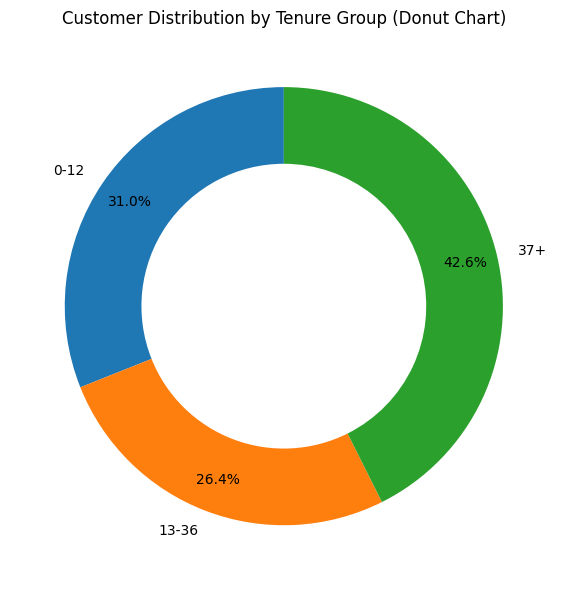

In [6]:
# Cell 2 — donut chart showing distribution by tenure_group

# Step 1: Count customers by tenure group, ensuring order follows 'labels' list
counts = df['tenure_group'].value_counts().reindex(labels)

# Step 2: Prepare data for the pie chart
labels_display = counts.index.astype(str)   # convert group labels to strings for display
sizes = counts.values                       # numeric counts per group

# Step 3: Create figure and axis
fig, ax = plt.subplots(figsize=(6,6))

# Step 4: Draw donut (pie) chart
# Note: returns 3 values since autopct is used
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels_display,
    startangle=90,                           # start from top (90 degrees)
    wedgeprops=dict(width=0.35),             # makes a ring (donut) by setting slice width
    autopct='%1.1f%%',                       # show percent with 1 decimal place
    pctdistance=0.85                         # position of % text
)

# Step 5: Draw a white circle in the center to create the donut hole
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# Step 6: Add title and formatting
ax.set_title('Customer Distribution by Tenure Group (Donut Chart)')
plt.tight_layout()

# Step 7: Display the chart
plt.show()


/tmp/ipykernel_16791/2708103272.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(['tenure_group', 'contract'])['monthly_charges'].mean().unstack().reindex(index=labels)


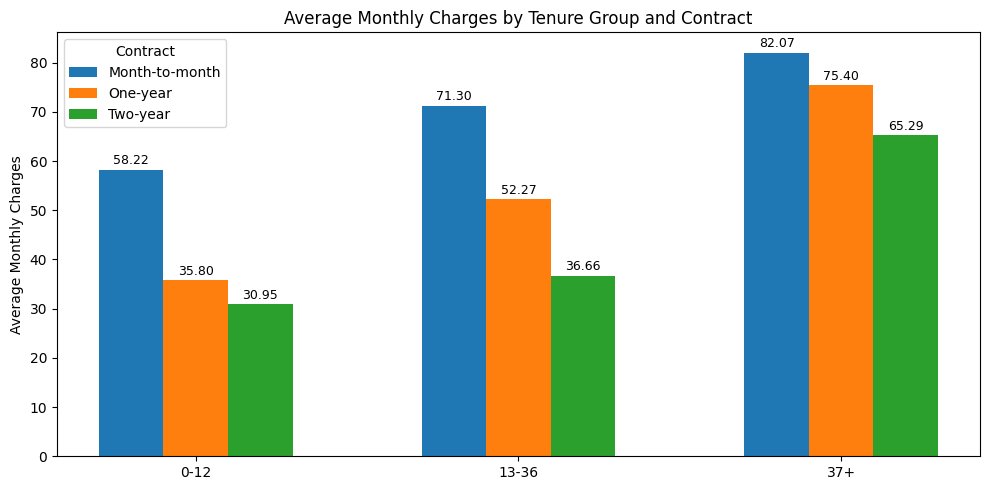

In [7]:
# Cell 3 — clustered bar chart (avg monthly_charges by tenure_group and contract)

agg = df.groupby(['tenure_group', 'contract'])['monthly_charges'].mean().unstack().reindex(index=labels)
agg
# plotting
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.2
x = np.arange(len(agg.index))
contracts = agg.columns.tolist()

for i, contract in enumerate(contracts):
    ax.bar(x + i*bar_width, agg[contract].values, width=bar_width, label=contract)

# annotations: show exact values above bars
for i, contract in enumerate(contracts):
    for j, val in enumerate(agg[contract].values):
        ax.text(x[j] + i*bar_width, val + 0.5, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x + bar_width*(len(contracts)-1)/2)
ax.set_xticklabels(agg.index)
ax.set_ylabel('Average Monthly Charges')
ax.set_title('Average Monthly Charges by Tenure Group and Contract')
ax.legend(title='Contract')
plt.tight_layout()
plt.show()


In [8]:
# Cell 4 — annotate percent difference between highest and lowest contract within each tenure group
# compute percent difference relative to lowest contract mean
for idx in agg.index:
    row = agg.loc[idx]
    min_val = row.min()
    max_val = row.max()
    pct_diff = (max_val - min_val) / min_val * 100 if min_val > 0 else np.nan
    print(f"{idx}: min={min_val:.2f}, max={max_val:.2f}, pct_diff={pct_diff:.1f}%")


0-12: min=30.95, max=58.22, pct_diff=88.1%
13-36: min=36.66, max=71.30, pct_diff=94.5%
37+: min=65.29, max=82.07, pct_diff=25.7%


In [9]:
# Cell 5 — interactive Plotly visualizations
import plotly.express as px
import plotly.graph_objects as go

# Donut chart (interactive)
counts_df = df['tenure_group'].value_counts().reindex(labels).reset_index()
counts_df.columns = ['tenure_group', 'count']
fig = px.pie(counts_df, names='tenure_group', values='count', hole=0.4, title='Customer Distribution by Tenure Group (Donut)')
fig.show()

# Interactive clustered bar chart: monthly_charges by tenure_group and contract
agg_reset = agg.reset_index().melt(id_vars='tenure_group', var_name='contract', value_name='avg_monthly_charges')
fig2 = px.bar(agg_reset, x='tenure_group', y='avg_monthly_charges', color='contract', barmode='group',
             title='Average Monthly Charges by Tenure Group and Contract', text='avg_monthly_charges')
fig2.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig2.show()


## 📈 Key Findings
- **Overall churn rate:** ~26.5% of customers have left the company.  
- **Short-term (month-to-month)** contracts show the **highest churn rate**, indicating low customer commitment.  
- Customers with **higher monthly charges** are **more likely to churn**.  
- **Long-term contract holders** and customers using **automatic payment methods** (e.g., bank transfer) tend to stay longer.  
- The **average tenure** of churned customers is roughly **half** that of retained ones.

---

## 💡 Business Insights
- High churn among short-term contracts suggests a **need for loyalty incentives** and **discounted long-term offers**.  
- Customers paying higher monthly fees may perceive **poor value for money** — review pricing structure and service quality for this group.  
- Introducing **customer feedback programs** can identify dissatisfaction early.  
- Simplifying **billing and payment processes** can improve user experience and retention.

---

## 🚀 Recommendations
| Area | Suggested Action | Expected Impact |
|------|------------------|-----------------|
| **Contracts** | Promote 1-year and 2-year plans with small discounts | Increase retention by improving long-term commitment |
| **Customer Engagement** | Implement follow-up calls or surveys after 3 months | Reduce early churn |
| **High-Value Customers** | Offer personalized retention offers | Retain profitable customers |
| **Billing Experience** | Streamline electronic payments | Minimize billing-related churn |
| **Performance Tracking** | Monitor churn monthly via dashboard | Enable proactive intervention |

---

## 🧩 Next Steps
- Build a **predictive churn model** using logistic regression or XGBoost.  
- Deploy the model into a **Streamlit interactive dashboard** for dynamic churn monitoring.  
- Integrate retention KPIs into business reports for data-driven decision making.

---

**Author:** *Lenix Owino Otieno*  
**Tools Used:** Python (Pandas, Matplotlib, Seaborn), Streamlit, Jupyter Notebook  
**Dataset:** Telco Customer Churn (IBM Sample Dataset)  

> “Customer churn is not just a number — it’s a signal of customer dissatisfaction. Understanding the reasons behind it is the first step toward business growth.”

